# Lab CNNs

## Integrantes
- Jose Asitimbay
- Brayan Lechon

# Activities

Repeat the sentiment analysis exercise from Lab 2. For this one you will consider the following models:

- RNN
- LSTM
- GRU

Compare the results with each other and the Naive Bayes model obtained in Lab 2. The group with the best weighted F1 score gets 3 extra points to the final grade, the second best get 2 points, and the third gets 1 point. 

To simplify, consider only 3 categories: negative, neutral and positive.

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from pathlib import Path



import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
# hide warnings
import warnings
warnings.filterwarnings('ignore')
import string

adaptamos el codigo para que funcione con cuda

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(1, device=device)
    print(f"GPU encontrada: {torch.cuda.get_device_name(0)}")

GPU encontrada: NVIDIA GeForce RTX 4060 Laptop GPU


## Dataset

In [41]:
df = pd.read_csv('./data/train.tsv.zip', sep='\t')
df_criticas = df[['Phrase', 'Sentiment']].copy(deep=True)
print(df_criticas.shape)
df_criticas.head()


(156060, 2)


,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


agrupamos los sentimientos en 3 categorias

In [45]:
def sentiment_label(sentiment):
    if sentiment <= 1:
        return 0
    elif sentiment == 2:
        return 1
    else:
        return 2

df_criticas['Sentiment'] = df['Sentiment'].apply(sentiment_label)
df_criticas['Sentiment_label'] = df_criticas['Sentiment'].map({0: 'negative', 1: 'neutral', 2: 'positive'})

<Axes: title={'center': 'len'}, xlabel='Sentiment_label'>

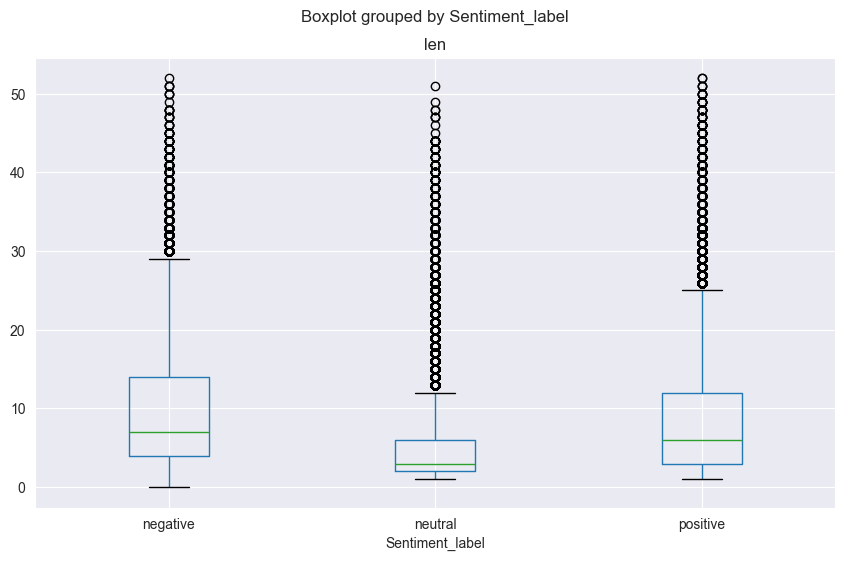

In [47]:
# boxplot of the length of the phrases by sentiment
df_criticas['Phrase'] = df_criticas['Phrase'].astype(str)
df_criticas['len'] = df_criticas['Phrase'].apply(lambda x: len(x.split()))
df_criticas.boxplot(column='len', by='Sentiment_label', figsize=(10, 6))


### Preprocesamiento de texto

tokens del texto con una limpeza eliminando signos de puntuación y convirtiendo el texto a minúsculas

In [48]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]','',text)    
    return tokenizer(text)

def tokenizer(text):
    tokens = [word for word in text.split() if word.lower() not in stop_words]
    return tokens

df_criticas['Text'] = df_criticas['Phrase'].apply(clean_text)

# filter phrases with less than 2 words

filtramos a las frases con menos de 2 palabras

In [49]:
df_criticas['n_words'] = df_criticas['Text'].apply(len)
df_criticas = df_criticas[df_criticas['n_words'] > 2]

df_criticas.shape

(82196, 6)

analizamos el texto limpio

<Axes: title={'center': 'len'}, xlabel='Sentiment_label'>

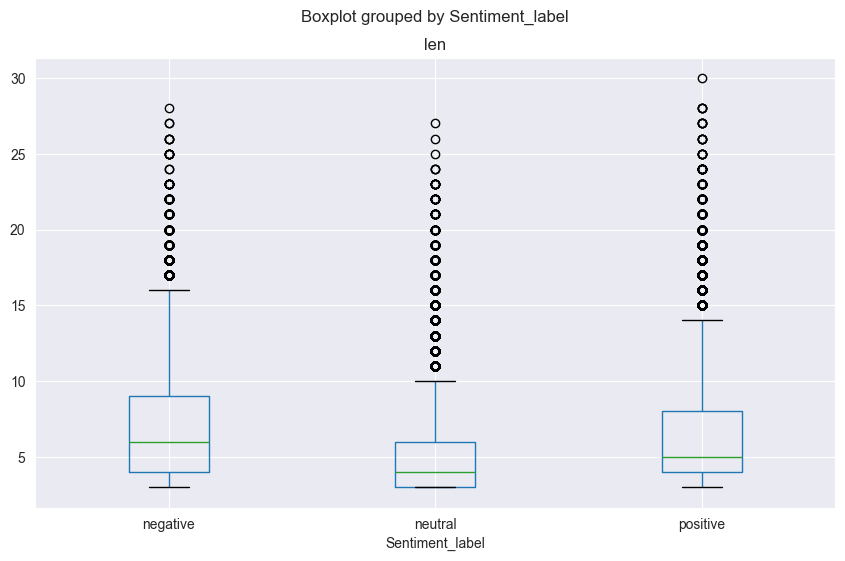

In [51]:
# boxplot of the length of the phrases by sentiment
df_criticas['len'] = df_criticas['Text'].apply(len)
df_criticas.boxplot(column='len', by='Sentiment_label', figsize=(10, 6))


creamos los embeddings

# Dataset

## Baseline CNN

## RNN

## LSTM

## GRU

# Conclusion